# DANL320 Final Project: Using Severe Storm Data for Dynamic Insurance Pricing

## Introduction

### Background

In recent years, natural disasters have taken a significant financial toll on the United States. In 2020 alone, U.S. natural disaster economic losses totaled 119 billion dollars, with severe storms accounting for 75%, or approximately 89.4 billion daollars of those damages. These storms, such as hurricanes, tornadoes, and hailstorms, pose a threat to human life and property. They can also lead to severe economic consequences for homeowners and insurance companies alike.

Storm data is critical, particularly for insurance companies when it comes to risk assessment, premium pricing, and targeted marketing strategies. While underpricing could lead to major economic losses for the insurance companies, overpricing could drive away customers. Accurate predictions of storm related property damage enable insurers to choose premiums that best reflect the risk of the storms in a particular area. However, accurate risk modeling is only possible when insurers can analyze and interpret past storm data in a meaningful and effective way. Insurance providers can improve their predictive models and develop sustainable pricing strategies by understanding which types of storms tend to cause the most damage and identifying the key variables involved in a high property damage storm.

### Problem Statement

Despite the abundance of historical storm data, insurers still face challenges when it comes to predicting which storms are likely to result in high property damage. Variability in storm type, geographic location, and magnitude complicate the risk modeling process. As a result, there is a growing need for data-driven approaches to help classify and predict storm severity based on historical storm patterns and determine the most influential factors in high damage levels.

This project aims to address this challenge by developing predictive models that classify whether a storm will cause high property damage based on different storm characteristics. This analysis aims to support informed decision making in the insurance industry.

### Objectives & Research Questions

The primary objectives of this project are as follows:


1.   Can we predict whether a storm will cause high property damage, defined as greater than $5,000, based on its characteristics?

This question aims to evaluate whether historical storm data can be used to reliably predict the level of damage to property that a storm might cause. A classification model will help to answer this question and determine if storm data can be used for risk assessment.

2.   Which factors are most important in predicting high property damage events?

Understanding what the most significant predictors of storm damage are will aid insurers in planning and prioritizing strategies.




To answer these questions, this project will utilize descriptive statistics, data visualization, and machine learning techniques, including logistic regression and random forest models. These techniques will help to explore patterns in the data, identify important predictors, and evaluate the accuracy of classification methods.

## Data

### Source & Scope

The data for this project comes from the Severe Weather Data Inventory (SWDI), maintained by the National Oceanic and Atmospheric Administration (NOAA). This is a publicly accessible data repository that includes detailed records of severe weather events in the United States dating back to 1970. NOAA’s SWDI is frequently used in environmental and risk assessment research. The dataset for this project was accessed directly from NOAA’s public data inventory and downloaded as a CSV file.

For this analysis, we will focus specifically on storm events that happened in the year of 2024. Narrowing down the time window will allow us to analyze the most recent patterns in storm behavior and property damage. This data is recorded on an event-level basis, meaning that the frequency of the data is irregular. Each row corresponds to a unique severe weather event, with the frequency depending on when the storm occurred during the year.

This dataset covers storm events for the entire United States. Specific geographic location is provided by state names as well as latitude and longitude coordinates. This allows us to analyze patterns across the entire country, or break the data down regionally if needed.

### Variables

This dataset includes several variables that describe the storms' characteristics in addition to their impact. The variables relevant to this project include:



*   ```EVENT_TYPE```: The classification of the storm event (e.g. tornado, hail, hurricane, etc.).
*   ```MAGNITUDE```: A numeric measure of the severity of the event.
* ```STATE_NAME```: The location (state) where the event occurred.
* ```MONTH_NAME```: The month when the event occurred in 2024.
* ```DAMAGE_PROPERTY```: The estimated dollar amount of damage to property.



Additional variables, such as damage category (high vs low), will be created during the cleaning and processing stage of the analysis.

In [5]:
import pandas as pd
storms_2024 = pd.read_csv('/content/drive/MyDrive/noaa_storms_2024.csv')
storms_2024.head(5)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202405,23,1947,202405,23,1947,190907,1180619,OKLAHOMA,40,...,4.0,S,FRIENDSHIP,34.6380,-99.2167,34.6380,-99.2167,Two primary rounds of severe convection occurr...,MPing report.,CSV
1,202411,16,230,202411,18,1421,197838,1223377,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...,CSV
2,202405,19,1839,202405,19,1902,190905,1184919,OKLAHOMA,40,...,5.0,N,CUSTER CITY,35.7100,-99.0010,35.7370,-98.8910,Significant severe weather occurred across por...,While the large multiple-vortex tornado was ap...,CSV
3,202405,23,2155,202405,23,2155,190907,1180805,OKLAHOMA,40,...,2.0,W,NINNEKAH,34.9501,-97.9523,34.9501,-97.9523,Two primary rounds of severe convection occurr...,Relayed image showing a portable outbuilding b...,CSV
4,202405,24,1405,202405,24,1410,191916,1182348,MISSISSIPPI,28,...,0.0,N,ALGOMA,34.1800,-89.0300,34.1800,-89.0300,An active storm pattern as several mid-level s...,Reports of trees down in Algoma.,CSV


### Cleaning & Processing

To ensure the dataset was suitable for further analysis and modeling, we will first clean and process the data. We will handle missing values, transform variables into usable formats, and create new variables needed for the analysis.

To start, we must apply transformations to a couple of the key variables to make the dataset more machine learning ready. First, we will standardize the values in the variable DAMAGE_PROPERTY. These values were recorded as text strings and must be converted to a numeric format. A new variable, DAMAGE_PROPERTY_numeric, will be created by converting the original values to numeric, dollar amounts (e.g. “15k” becomes 15000). Additionally, a new binary variable will be created as a target variable for classification models and data visualization. This variable is named HIGH_DAMAGE and is based on the numeric property damage. This variable takes the value 1 if the storm caused more than $5,000 in property damage, and 0 otherwise. This threshold allows for differentiation between low and high damage events as we answer our research questions.

In [6]:
storms_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70196 entries, 0 to 70195
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     70196 non-null  int64  
 1   BEGIN_DAY           70196 non-null  int64  
 2   BEGIN_TIME          70196 non-null  int64  
 3   END_YEARMONTH       70196 non-null  int64  
 4   END_DAY             70196 non-null  int64  
 5   END_TIME            70196 non-null  int64  
 6   EPISODE_ID          70196 non-null  int64  
 7   EVENT_ID            70196 non-null  int64  
 8   STATE               70196 non-null  object 
 9   STATE_FIPS          70196 non-null  int64  
 10  YEAR                70196 non-null  int64  
 11  MONTH_NAME          70196 non-null  object 
 12  EVENT_TYPE          70196 non-null  object 
 13  CZ_TYPE             70196 non-null  object 
 14  CZ_FIPS             70196 non-null  int64  
 15  CZ_NAME             70196 non-null  object 
 16  WFO 

In [7]:
storms_2024['DAMAGE_PROPERTY']

,DAMAGE_PROPERTY
0,NaN
1,0.00K
2,150.00K
3,10.00K
4,1.00K
...,...
70191,0.00K
70192,0.00K
70193,0.00K
70194,15.00K


In [8]:
# Code generated with Google Colab AI Assistance

def parse_damage(damage_str):
    if pd.isna(damage_str):
        return None
    damage_str = str(damage_str).upper().strip()
    if 'K' in damage_str:
        return float(damage_str.replace('K', '')) * 1000
    elif 'M' in damage_str:
        return float(damage_str.replace('M', '')) * 1000000
    elif 'B' in damage_str:
        return float(damage_str.replace('B', '')) * 1000000000
    else:
        try:
            return float(damage_str)
        except ValueError:
            return None

storms_2024['DAMAGE_PROPERTY_numeric'] = storms_2024['DAMAGE_PROPERTY'].apply(parse_damage)

storms_2024[['DAMAGE_PROPERTY', 'DAMAGE_PROPERTY_numeric']]

,DAMAGE_PROPERTY,DAMAGE_PROPERTY_numeric
0,NaN,NaN
1,0.00K,0.0
2,150.00K,150000.0
3,10.00K,10000.0
4,1.00K,1000.0
...,...,...
70191,0.00K,0.0
70192,0.00K,0.0
70193,0.00K,0.0
70194,15.00K,15000.0


In [9]:
storms_2024['HIGH_DAMAGE'] = (storms_2024['DAMAGE_PROPERTY_numeric'] > 5000).astype(int)

storms_2024['HIGH_DAMAGE']

,HIGH_DAMAGE
0,0
1,0
2,1
3,1
4,0
...,...
70191,0
70192,0
70193,0
70194,1


Before any exploratory data analysis or modeling, we must be sure to remove any missing values in the dataset. Missing values in the key variables EVENT_TYPE, MAGNITUDE, MONTH_NAME, STATE_NAME, and HIGH_DAMAGE will be removed. This ensures that the dataset only includes complete entries, thus avoiding errors during model training.

In [10]:
storms_2024.dropna(subset=['MAGNITUDE'], inplace=True)
storms_2024.dropna(subset=['MONTH_NAME'], inplace=True)
storms_2024.dropna(subset=['EVENT_TYPE'], inplace=True)
storms_2024.dropna(subset=['HIGH_DAMAGE'], inplace=True)
storms_2024.dropna(subset=['STATE'], inplace=True)

### Descriptive Summary

To better understand the patterns and relationships within the dataset, we will provide a variety of summary statistics and visualizations. We can use this information to further explore the distribution of key variables and their relationship to storm-related property damage. This descriptive summary also provides a foundation for modeling by revealing potential key predictors of high damage storms.

#### Summary Statistics

In [12]:
storms_2024['DAMAGE_PROPERTY_numeric'].describe()

,DAMAGE_PROPERTY_numeric
count,2.747000e+04
mean,2.686664e+04
std,6.729330e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.500000e+03
max,7.000000e+07


The property damage data is highly skewed, with over 50% of storms causing no reported damage and a few extreme events contributing to the large mean and standard deviation. To ensure that high property damage in our binary classification variable isn't underrepresented, we will remove storms that did not have any reported damage.

In [15]:
storms_2024 = storms_2024[storms_2024['DAMAGE_PROPERTY_numeric'] > 0]

storms_2024['DAMAGE_PROPERTY_numeric'].describe()

,DAMAGE_PROPERTY_numeric
count,1.036700e+04
mean,7.119000e+04
std,1.093996e+06
min,1.000000e+01
25%,1.000000e+03
50%,3.000000e+03
75%,1.000000e+04
max,7.000000e+07


After excluding storms that did not contribute to significant property damage, the new summary statistics now provide a more accurate representation of the economic impact of storms. The median (3,000) and the interquartile range (Q1 to Q3: 1,000 to 10,000) suggest that the majority of storms still fall well below the extreme maximum values.

In [61]:
storms_2024['MAGNITUDE'].describe()

,MAGNITUDE
count,10367.000000
mean,48.552771
std,14.823058
min,0.250000
25%,50.000000
50%,50.000000
75%,52.000000
max,103.000000


Key summary statistics were also calculated for the event magnitude, including the mean, median, and standard deviation. These statistics show that that storm magnitude greatly varies across storm events. The median magnitude is slightly higher than the mean, indicating that the distribution could be slightly left skewed. The maximum value, 103, is much greater than the mean, 48.55, which may indicate a few outliers.

In [16]:
# Create classification variable again using filtered property damage data

storms_2024['HIGH_DAMAGE'] = (storms_2024['DAMAGE_PROPERTY_numeric'] > 5000).astype(int)

storms_2024['HIGH_DAMAGE']

,HIGH_DAMAGE
3,1
4,0
23,1
192,1
193,0
...,...
70175,0
70178,1
70183,0
70184,0


<ipython-input-18-adab0dfb80d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=damage_counts.index, y=damage_counts.values, palette='viridis')


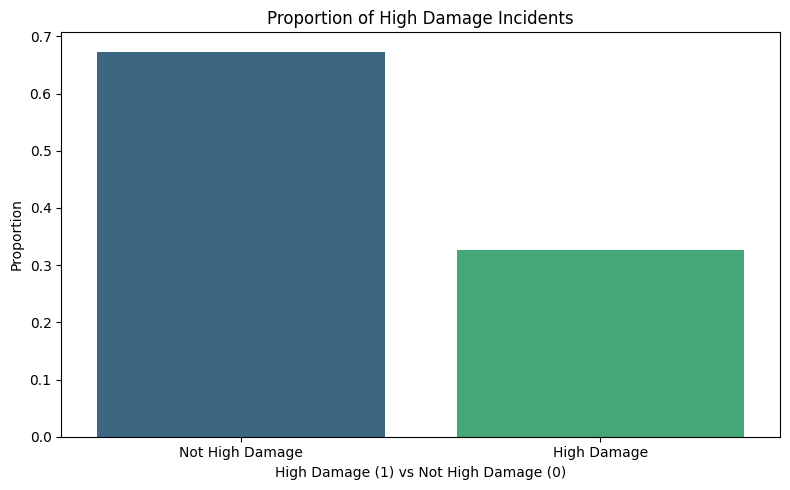

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportion of high damage vs not high damage
damage_counts = storms_2024['HIGH_DAMAGE'].value_counts(normalize=True)

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=damage_counts.index, y=damage_counts.values, palette='viridis')
plt.title('Proportion of High Damage Incidents')
plt.xlabel('High Damage (1) vs Not High Damage (0)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Not High Damage', 'High Damage'])
plt.tight_layout()
plt.show()

A bar chart was used to visualize the proportion between events classified as high damage (property damage greater than 5000) and events classified as not high damage. This chart revealed that approximately two thirds of storms were not high damage, while only one third of storms met the threshold for high damage. This class imbalance is important to note moving forward as it may impact model performance, particularly for logistic regression.

<ipython-input-24-44090a061d6e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_damage.index, y=top_states_damage.values, palette='viridis')


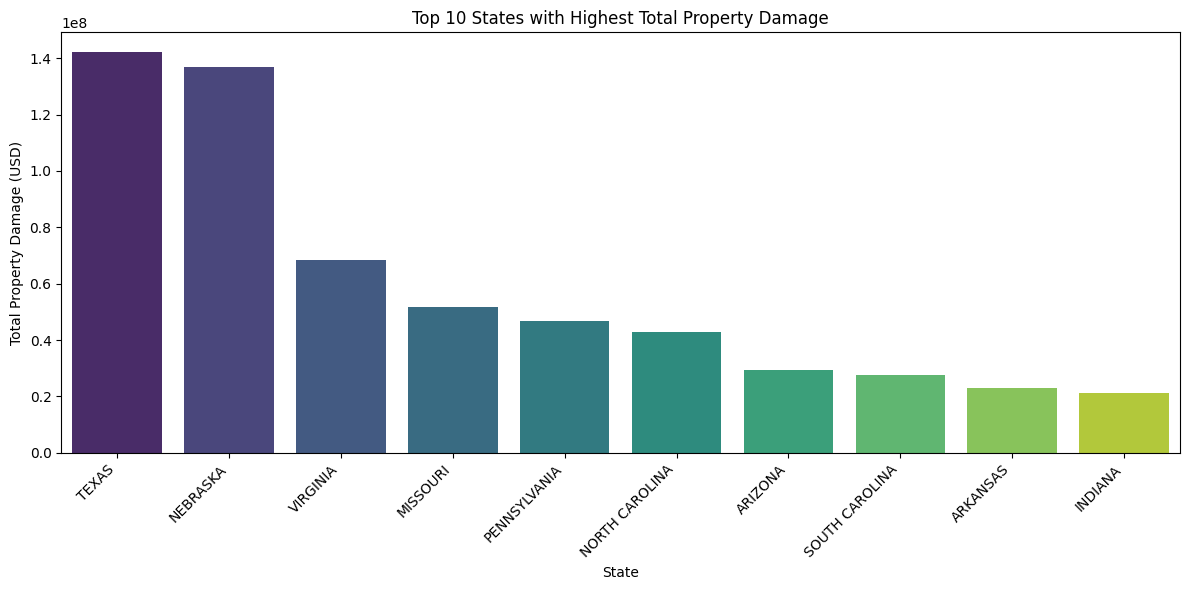

In [24]:
import matplotlib.pyplot as plt
# Group by state and sum property damage
state_damage = storms_2024.groupby('STATE')['DAMAGE_PROPERTY_numeric'].sum().sort_values(ascending=False)

# Select top 10 states
top_states_damage = state_damage.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states_damage.index, y=top_states_damage.values, palette='viridis')
plt.title(f'Top 10 States with Highest Total Property Damage')
plt.xlabel('State')
plt.ylabel('Total Property Damage (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart displaying the top 10 U.S. states by total property damage in 2024 revealed that Texas experienced the highest overall economic loss, with Nebraska coming in a close second. This shows that there is still great impact beyond coastal storms associated with hurricanes. States more inland that are prone to other types of storms also face significant risk. Geographic location may be a significant factor in storm damage predictions.

<ipython-input-29-9a11109300de>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_event_damage.index, y=top5_event_damage.values, palette='viridis')


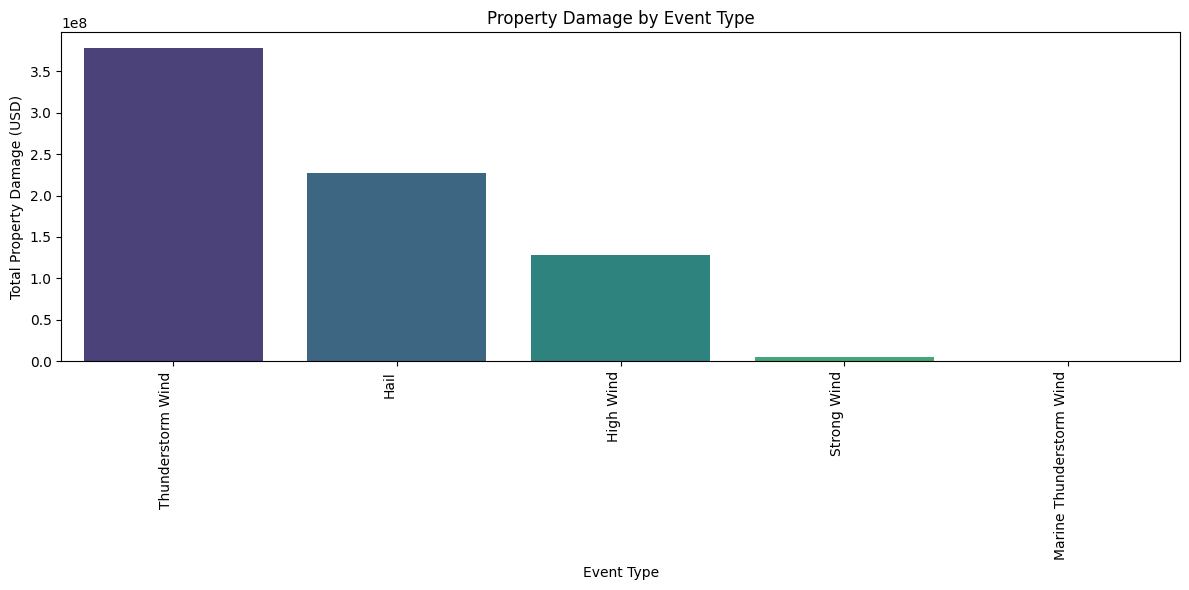

In [29]:
event_damage = storms_2024.groupby('EVENT_TYPE')['DAMAGE_PROPERTY_numeric'].sum().sort_values(ascending=False)

# Select top 5 event types
top5_event_damage = event_damage.head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_event_damage.index, y=top5_event_damage.values, palette='viridis')
plt.title('Property Damage by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Total Property Damage (USD)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

This bar chart, showing total property damage by event type, revealed that thunderstorm wind caused the highest overall property damage in 2024, followed by hail. These two event types are less dramatic than hurricanes and tornadoes, yet still contributed to the most damage. This shows that frequent, lower profile storms could collectively result in greater loss financially and may be a key predictor in future storm damage.

<ipython-input-32-b2bf9dd92e34>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_damage = storms_2024.groupby('MONTH_NAME')['DAMAGE_PROPERTY_numeric'].sum()
<ipython-input-32-b2bf9dd92e34>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_damage.index, y=month_damage.values, palette='viridis')


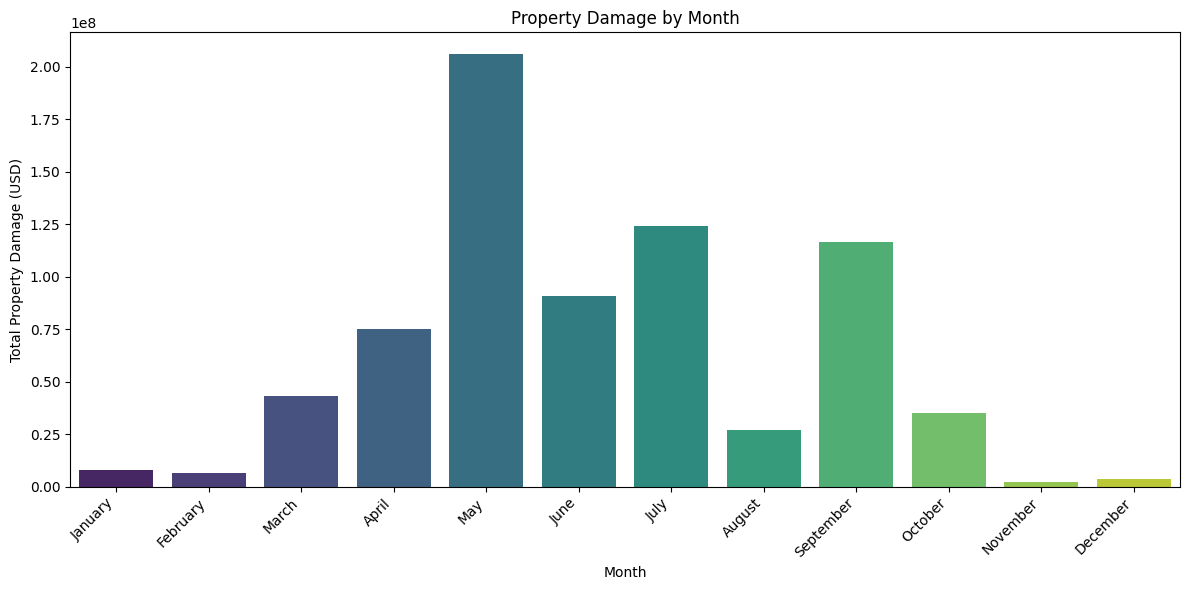

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

storms_2024['MONTH_NAME'] = pd.Categorical(storms_2024['MONTH_NAME'], categories=month_order, ordered=True)

month_damage = storms_2024.groupby('MONTH_NAME')['DAMAGE_PROPERTY_numeric'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=month_damage.index, y=month_damage.values, palette='viridis')
plt.title('Property Damage by Month')
plt.xlabel('Month')
plt.ylabel('Total Property Damage (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart depicting total property damage by month showed that May had the highest overall damage, followed by July, September, and June. This shows us that most of the damage took place in summer and early fall and that there could be seasonal severe weather trends. Storm related property damage is not evenly distributed throughout the year, meaning that timing may be an important factor in risk assessment.

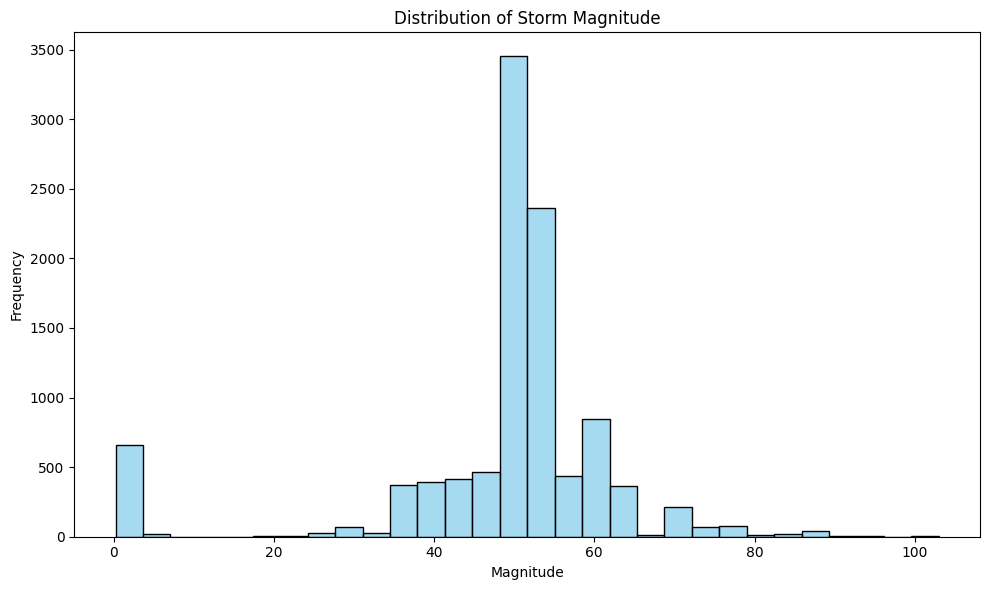

In [37]:
# Histogram for 'MAGNITUDE'
plt.figure(figsize=(10, 6))
sns.histplot(storms_2024['MAGNITUDE'].dropna(), bins=30, color='skyblue')
plt.title('Distribution of Storm Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution of storm magnitude, depicted with a histogram, shows a concentrated distribution with a peak around 50. The majority of storms fall between magnitudes of 40 and 60, indicating a fairly narrow range for most storm events. However, there is another smaller peak around 0, indicating that there could be some outliers.

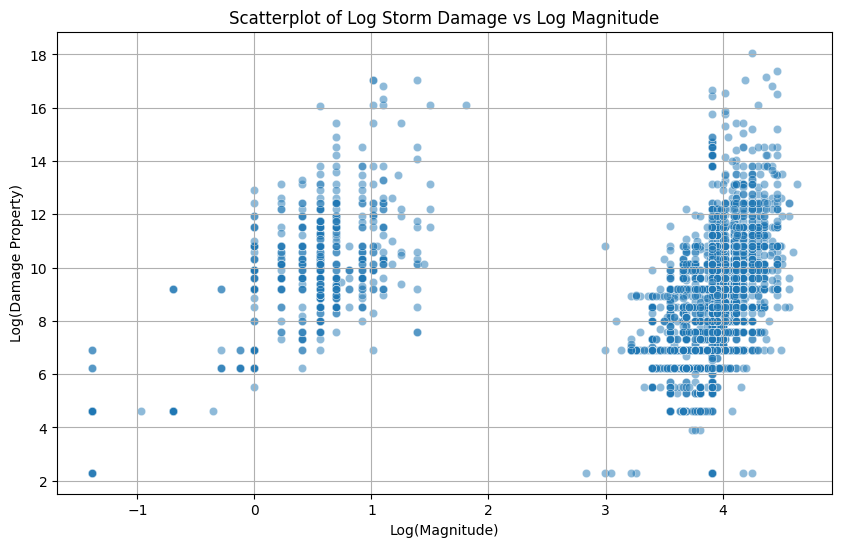

In [66]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
sns.scatterplot(data=storms_2024, x=np.log(storms_2024['MAGNITUDE']), y=np.log(storms_2024['DAMAGE_PROPERTY_numeric']), alpha=0.5)
plt.title('Scatterplot of Log Storm Damage vs Log Magnitude')
plt.xlabel('Log(Magnitude)')
plt.ylabel('Log(Damage Property)')
plt.grid(True)
plt.show()

A scatterplot of Log(Property Damage) versus Log(Magnitude) was created to analyze the relationship between the two variables. This is important as magnitude will be a predictor variable in our machine learning models with property damage as the outcome variable. The plot shows a positive trend overall. As storm magnitude increases, property damage generally increases as well. There is some clustering at certain magnitude levels, however, it is clear that magnitude may be an important factor in predicting storm damage. It is important to note that for the purposes of this scatterplot, the two variables first went under a log transformation to make the plot easier to view and interpret given the underrepresentation of high property damage values.

### Model Motivation

The structure and content of this dataset make it well suited for a classification machine learning analysis. The data includes detailed characteristics by event, such as event type, magnitude, location, and property damage. With one goal being to classify whether or not a storm causes high property damage, a new binary classification variable was created, ```HIGH_DAMAGE```. This aligns with classification models such as Logistic Regression. Additionally, this dataset is large and covers thousands of events across the entire United States. This provides a broad range of information on storm characteristics. The wide range of data, including both categorical and continuous variables, provides us with the tools necessary to create and interpret meaningful machine learning models to help answer our initial research questions.

## Machine Learning Models

### Logistic Regression

To predict whether a storm would cause high property damage (>5000), a classification model, specifically logistic regression, will be built and analyzed. This model will be trained on event-level storm data from 2024 using a variety of storm event characteristics as predictor variables. Logistic Regression will help us to model the probability of high damage as a function of storm characteristics, assuming a linear relationship between the two.

Before we begin building the model, we must import all packages necessary for Logistic Regression and define a function for adding dummy variables in place of categorical variables.

In [38]:
# Below is for an interactive display of Pandas DataFrame in Colab
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
import numpy as np
from tabulate import tabulate  # for table summary
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # for lowess smoothing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

from pyspark.sql import SparkSession
from pyspark.sql.functions import rand, col, pow, mean, avg, when, log, sqrt, exp
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, GeneralizedLinearRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [39]:
def add_dummy_variables(var_name, reference_level, category_order=None):
    """
    Creates dummy variables for the specified column in the global DataFrames dtrain and dtest.
    Allows manual setting of category order.

    Parameters:
        var_name (str): The name of the categorical column (e.g., "borough_name").
        reference_level (int): Index of the category to be used as the reference (dummy omitted).
        category_order (list, optional): List of categories in the desired order. If None, categories are sorted.

    Returns:
        dummy_cols (list): List of dummy column names excluding the reference category.
        ref_category (str): The category chosen as the reference.
    """
    global dtrain, dtest

    # Get distinct categories from the training set.
    categories = dtrain.select(var_name).distinct().rdd.flatMap(lambda x: x).collect()

    # Convert booleans to strings if present.
    categories = [str(c) if isinstance(c, bool) else c for c in categories]

    # Use manual category order if provided; otherwise, sort categories.
    if category_order:
        # Ensure all categories are present in the user-defined order
        missing = set(categories) - set(category_order)
        if missing:
            raise ValueError(f"These categories are missing from your custom order: {missing}")
        categories = category_order
    else:
        categories = sorted(categories)

    # Validate reference_level
    if reference_level < 0 or reference_level >= len(categories):
        raise ValueError(f"reference_level must be between 0 and {len(categories) - 1}")

    # Define the reference category
    ref_category = categories[reference_level]
    print("Reference category (dummy omitted):", ref_category)

    # Create dummy variables for all categories
    for cat in categories:
        dummy_col_name = var_name + "_" + str(cat).replace(" ", "_")
        dtrain = dtrain.withColumn(dummy_col_name, when(col(var_name) == cat, 1).otherwise(0))
        dtest = dtest.withColumn(dummy_col_name, when(col(var_name) == cat, 1).otherwise(0))

    # List of dummy columns, excluding the reference category
    dummy_cols = [var_name + "_" + str(cat).replace(" ", "_") for cat in categories if cat != ref_category]

    return dummy_cols, ref_category


# Example usage without category_order:
# dummy_cols_year, ref_category_year = add_dummy_variables('year', 0)

# Example usage with category_order:
# custom_order_wkday = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
# dummy_cols_wkday, ref_category_wkday = add_dummy_variables('wkday', reference_level=0, category_order = custom_order_wkday)

The outcome variable will be ```HIGH_DAMAGE```, a binary variable with 1 indicating high property damage (> 5000) and 0 otherwise. Predictor variables include:
* Magnitude (numeric)
* Event type (categorical)
* Month (categorical)
* State (categorical)

Categorical variables cannot be used for Logistic Regression, so all categorical variables will be converted to dummy variables using the dummy variable function defined earlier. The data will then be split into training and testing sets, with 50% going to training and 50% going to testing. Once this is complete, we can train and make predictions with the model.



In [41]:
df = spark.createDataFrame(storms_2024)

In [42]:
dtrain, dtest = df.randomSplit([0.5, 0.5], seed = 1234)

In [43]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dummy_cols_MONTH, ref_category_MONTH = add_dummy_variables('MONTH_NAME', 0, category_order=months_order)
dummy_cols_EVENT_TYPE, ref_category_EVENT_TYPE = add_dummy_variables('EVENT_TYPE', 0)
dummy_cols_STATE, ref_category_STATE = add_dummy_variables('STATE', 0)

Reference category (dummy omitted): January
Reference category (dummy omitted): Hail
Reference category (dummy omitted): ALABAMA


In [44]:
# assembling predictors
x_cols = ['MAGNITUDE']

# Keep the name assembler_predictors unchanged,
#   as it will be used as a global variable in the marginal_effects UDF.
assembler_predictors = (
    x_cols +
    dummy_cols_MONTH +
    dummy_cols_EVENT_TYPE +
    dummy_cols_STATE
)

assembler_1 = VectorAssembler(
    inputCols = assembler_predictors,
    outputCol = "predictors"
)

dtrain_1 = assembler_1.transform(dtrain)
dtest_1  = assembler_1.transform(dtest)

In [45]:
# training the model
model_1 = (
    GeneralizedLinearRegression(featuresCol="predictors",
                                labelCol="HIGH_DAMAGE",
                                family="binomial",
                                link="logit")
    .fit(dtrain_1)
)

In [46]:
# making prediction on both training and test
dtrain_1 = model_1.transform(dtrain_1)
dtest_1 = model_1.transform(dtest_1)

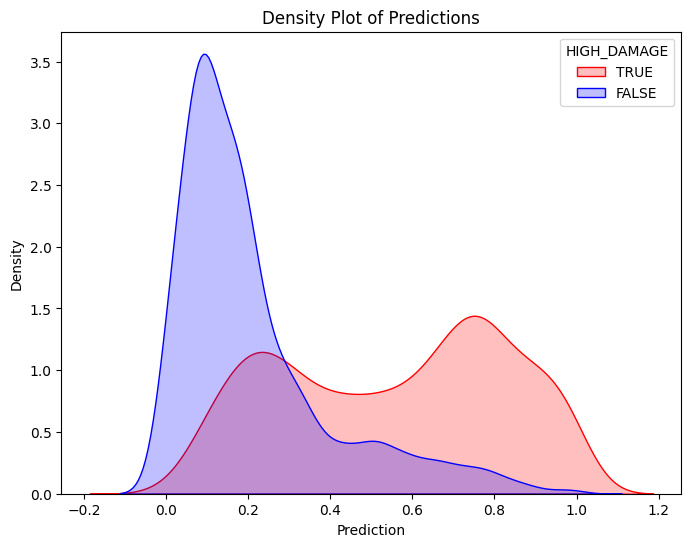

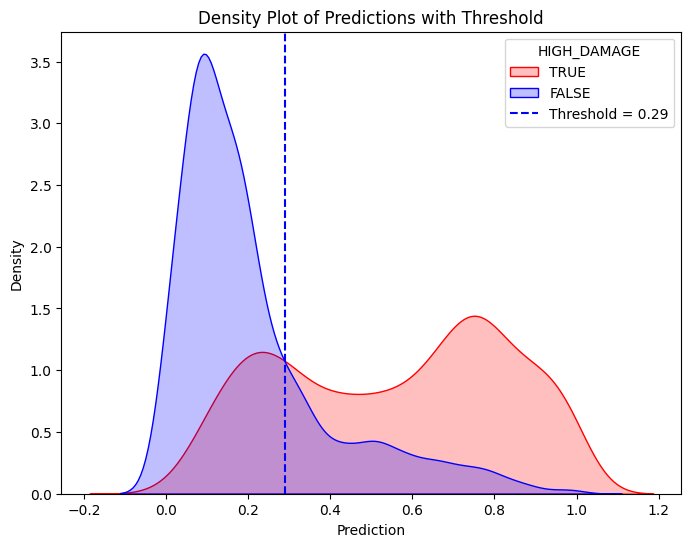

In [53]:
pdf = dtrain_1.select("prediction", "HIGH_DAMAGE").toPandas()

train_true = pdf[pdf["HIGH_DAMAGE"] == 1]
train_false = pdf[pdf["HIGH_DAMAGE"] == 0]

# Create the first density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(train_true["prediction"], label="TRUE", color="red", fill=True)
sns.kdeplot(train_false["prediction"], label="FALSE", color="blue", fill=True)
plt.xlabel("Prediction")
plt.ylabel("Density")
plt.title("Density Plot of Predictions")
plt.legend(title="HIGH_DAMAGE")
plt.show()

# Define threshold for vertical line
threshold = 0.29  # Replace with actual value

# Create the second density plot with vertical line
plt.figure(figsize=(8, 6))
sns.kdeplot(train_true["prediction"], label="TRUE", color="red", fill=True)
sns.kdeplot(train_false["prediction"], label="FALSE", color="blue", fill=True)
plt.axvline(x=threshold, color="blue", linestyle="dashed", label=f"Threshold = {threshold}")
plt.xlabel("Prediction")
plt.ylabel("Density")
plt.title("Density Plot of Predictions with Threshold")
plt.legend(title="HIGH_DAMAGE")
plt.show()

To evaluate the model's predictions, a double density plot of predictions was generated using the trained Logistic Regression model. The plot, shown above, illustrates a clear separation between between the two classes. The high damage predictions are skewed more towards higher probabilities, while the low damage predictions are concentrated near zero. A classification threshold of 0.29 is marked on the second plot above with a dashed line. Predictions greater than 0.29 are classified as high damage. Predictions less than the indiciated threshold are classified as not high damage, or low damage. The separation between the two outcomes shows that the model can moderately decipher between high damage and low damage. The model is able to assign higher probabilities to high damage events. Storms that are predicted to be above the threshold will be more likely to cause significant property damage.

In [67]:
# Compute confusion matrix
dtest_1 = dtest_1.withColumn("predicted_class", when(col("prediction") > .29, 1).otherwise(0))
conf_matrix = dtest_1.groupBy("HIGH_DAMAGE", "predicted_class").count().orderBy("HIGH_DAMAGE", "predicted_class")

TP = dtest_1.filter((col("HIGH_DAMAGE") == 1) & (col("predicted_class") == 1)).count()
FP = dtest_1.filter((col("HIGH_DAMAGE") == 0) & (col("predicted_class") == 1)).count()
FN = dtest_1.filter((col("HIGH_DAMAGE") == 1) & (col("predicted_class") == 0)).count()
TN = dtest_1.filter((col("HIGH_DAMAGE") == 0) & (col("predicted_class") == 0)).count()

accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
average_rate = (TP + FN) / (TP + TN + FP + FN)  # Proportion of actual at-risk babies
enrichment = precision / average_rate


# Print formatted confusion matrix with labels
print("\n Confusion Matrix:\n")
print("                     Predicted")
print("            |  Negative  |  Positive  ")
print("------------+------------+------------")
print(f"Actual Neg. |    {TN:5}   |    {FP:5}  |")
print("------------+------------+------------")
print(f"Actual Pos. |    {FN:5}   |    {TP:5}  |")
print("------------+------------+------------")


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity:  {specificity:.4f}")
print(f"Average Rate: {average_rate:.4f}")
print(f"Enrichment:   {enrichment:.4f} (Relative Precision)")


 Confusion Matrix:

                     Predicted
            |  Negative  |  Positive  
------------+------------+------------
Actual Neg. |     2626   |      798  |
------------+------------+------------
Actual Pos. |      424   |     1283  |
------------+------------+------------
Accuracy:  0.7618
Precision: 0.6165
Recall (Sensitivity): 0.7516
Specificity:  0.7669
Average Rate: 0.3327
Enrichment:   1.8532 (Relative Precision)


To evaluate the model's effectiveness in predicting high damage storms, we can evaluate the confusion matrix results using the threshold 0.29. Shown above, the results indicate that the model performs fairly well and balances false negatives and false positives. For example, there is a good trade off between the prediction of high damage storms and minimizing false positive storms. The recall is about 75%, showing that the model could correctly identify the majority of high damage storms. A precision value of approximately 62% indicates that 62% of the storms the model predicts to be high damage are in fact severe. These metrics, along with a reasonably high accuracy of 76%, show that overall, our model can predict high damage storms fairly well given our predictor variables.

### Random Forest

Given that our Logistic Regression model can predict high damage storms reasonably well, we can now move to our next question: which factors are most important in predicting property damagefrom storms?

To tackle this question, we will utilize a Random Forest Model. A Random Forest Model is a non-linear model that builds multiple decision trees and averages their outputs. It can often handle complex relationships better than Logistic Regression. Most importantly to this project, it provides feature importance scores. We can use these feature importances to interpret which variables are most important in predicting property damage.

Once again, we must first import all packages necessary for a Random Forest Model.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from sklearn.inspection import PartialDependenceDisplay

For this model, we will use the same predictor variables as our Logistic Regression model. However, our outcome variable will simply be the amount of property damage caused by the storm, ```DAMAGE_PROPERTY_numeric```, rather than a binary variable. This will allow us to see which variables contribute the most to the total property damage.

To start, we will split the data into training and testing sets, with 20% of the data going to testing. Then, we can build the model itself and use it to make predictions.

In [56]:
# Suppose df is your dataset and 'medv' is the response variable.
# Split into training and testing sets (similar to the R code)
X = storms_2024[['MONTH_NAME', 'MAGNITUDE', 'EVENT_TYPE', 'STATE']]
y = storms_2024['DAMAGE_PROPERTY_numeric']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['MONTH_NAME', 'EVENT_TYPE', 'STATE'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build the Random Forest model
# max_features=13 means that at each split the algorithm randomly considers 13 predictors.
rf = RandomForestRegressor(max_features=5,  # Use 13 features at each split
                           n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error
rf.fit(X_train, y_train)


# Print the model details
print("Random Forest Model:")
print(rf)

# Output the model details (feature importances, OOB score, etc.)
print("Out-of-bag score:", rf.oob_score_)  # A rough estimate of generalization error


# Generate predictions on training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Mean Squared Errors (MSE) for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Optional: Plot predicted vs. observed values for test data
# plt.figure(figsize=(8,6), dpi=300)
# plt.scatter(y_test, y_test_pred, alpha=0.7)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
# plt.xlabel("Observed medv")
# plt.ylabel("Predicted medv")
# plt.title("Random Forest: Observed vs. Predicted Values")
# plt.show()

Random Forest Model:
RandomForestRegressor(max_features=5, n_estimators=500, oob_score=True,
                      random_state=42)
Out-of-bag score: -0.04425313269898723
Train MSE: 706988378469.5167
Test MSE: 1819230345591.1472


After training and building the model, we can see that the Test Mean Squared Error (MSE) is significantly higher than the Train MSE. This suggests overfitting in the model. The model can identify patterns better in training than testing data. It is much weaker in recognizing these patterns in unseen data. This could be due to the disparity in high damage versus not high damage amounts, with high damage being underrepresented in the data.

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters: {'max_features': 7, 'min_samples_leaf': 5}


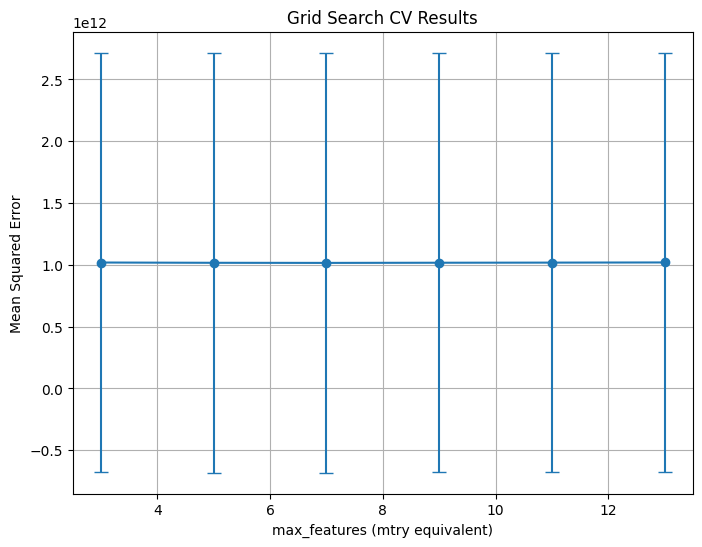

In [59]:
# Define the grid of hyperparameters:
# - min_samples_leaf is the minimum number of samples in a terminal node.
param_grid = {
    "max_features": list(range(3, 15, 2)),
    "min_samples_leaf": [5]
}

# Initialize the RandomForestRegressor:
# - n_estimators is set to 50 (equivalent to num.trees)
# - random_state is set for reproducibility.
# rf = RandomForestRegressor(n_estimators=50, random_state=1917)

rf = RandomForestRegressor(n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error

# Set up 10-fold cross-validation and GridSearch over the parameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

# Extract the best parameters
print("Best Parameters:", grid_search.best_params_)

# To replicate the ggplot visualization from R, we plot the grid search results.
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8, 6))
plt.errorbar(
    results["param_max_features"].astype(int),
    -results["mean_test_score"],
    yerr=results["std_test_score"],
    fmt="o-",
    capsize=5
)
plt.title("Grid Search CV Results")
plt.xlabel("max_features (mtry equivalent)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


Above, we can see results for our Grid Search Cross Validation. Once again, we can see that there is a very large MSE across test values of our ```max_features```. This indicates poor model performance. However, the MSE seems to remain constant across the number of features considered.

Variable Importances:
MAGNITUDE: 0.4647
MONTH_NAME_February: 0.0012
MONTH_NAME_March: 0.0101
MONTH_NAME_April: 0.0071
MONTH_NAME_May: 0.0309
MONTH_NAME_June: 0.0209
MONTH_NAME_July: 0.0141
MONTH_NAME_August: 0.0038
MONTH_NAME_September: 0.0555
MONTH_NAME_October: 0.0236
MONTH_NAME_November: 0.0012
MONTH_NAME_December: 0.0009
EVENT_TYPE_High Wind: 0.0449
EVENT_TYPE_Marine Strong Wind: 0.0000
EVENT_TYPE_Marine Thunderstorm Wind: 0.0000
EVENT_TYPE_Strong Wind: 0.0077
EVENT_TYPE_Thunderstorm Wind: 0.0693
STATE_ALASKA: 0.0000
STATE_AMERICAN SAMOA: 0.0000
STATE_ARIZONA: 0.0000
STATE_ARKANSAS: 0.0140
STATE_ATLANTIC NORTH: 0.0000
STATE_CALIFORNIA: 0.0015
STATE_COLORADO: 0.0000
STATE_CONNECTICUT: 0.0001
STATE_DISTRICT OF COLUMBIA: 0.0000
STATE_FLORIDA: 0.0001
STATE_GEORGIA: 0.0015
STATE_GUAM: 0.0000
STATE_GUAM WATERS: 0.0000
STATE_GULF OF MEXICO: 0.0000
STATE_HAWAII: 0.0000
STATE_IDAHO: 0.0001
STATE_ILLINOIS: 0.0008
STATE_INDIANA: 0.0065
STATE_IOWA: 0.0000
STATE_KANSAS: 0.0046
STATE_KENTUCKY: 0

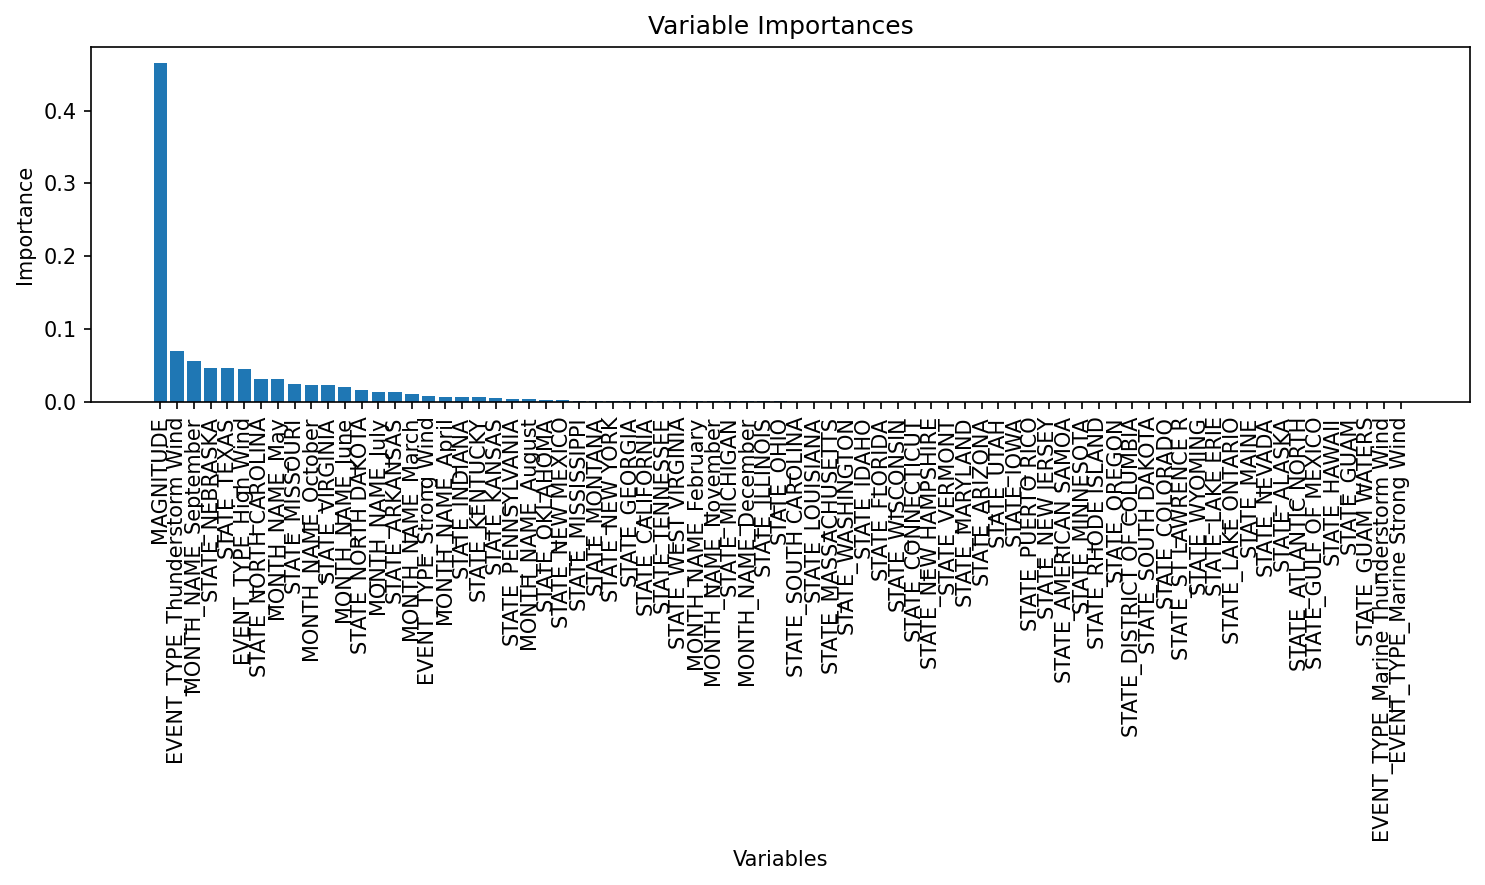

In [60]:
# Get the best estimator from the grid search
best_rf_model = grid_search.best_estimator_

# Get feature importances from the best model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

print("Variable Importances:")
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")

# Plot the feature importances, similar to varImpPlot(bag.boston) in R
# Sort the features by importance for a nicer plot.
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6), dpi=150)
plt.title("Variable Importances")
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Finally, we will take a look at the variable importances based on the Random Forest Model. This quantifies the contribution each predictor variable has in predicting the outcome variable, in this case storm damage. The resulting plot shows that magnitude was by far the most important predictor. Although less impactful, the next influencial predictors were thunderstorm wind (event type), the month of September, and the state of Nebraska. This indicates that event type, month, and state have little influence on predicting storm damage relative to magnitude. Based on these results, magnitude is the most important factor to consider when predicting storm damage to property.

## Business Implications

Based on the insights gained from this analysis, there are a few considerations and implications for insurance companies:

1. **Improved Risk Assessment**

The ability to predict whether a future storm is likely to cause significant property damage is crucial to insurers. It enables insurance companies to assess the risk associated with different types of storms and geographic locations. For example, we identified magnitude as the most important variable to consider when predicting damage. Knowledge of magnitude, especially in certain geographic locations, could help insurers prioritize this variable when evaluating risk.

2. **Smart, Dynamic Premium Pricing**

With more accurate predictions of storms, insurers can develop premiums that are informed by data. This allows them to avoid underpricing or overpricing by charging premiums that reflect risk based on the characteristics of the storms in the area. This improves and balances both customer satisfaction and profitability.

3. **Targeted Marketing and Customer Segmentation**

Recognizing patterns in time of year and frequent storm types associated with high damage can help insurers target their marketing efforts to different customer bases. They can promote more specialized insurance options to higher risk areas.




## Conclusion

This project explored whether storm characteristics can be used to predict high property damage. Through this, we were also able to determine the most influential factors when it comes to prediciting storm damage. Using storm data from 2024, we applied machine learning techniques including Logistic Regression and a Random Forest Model to analyze the the relationship between storm characteristics and property damage.

Our findings revealed that magnitude is the most critical factor in predicting property damage from storms. Other factors, such as location, event type, and month contribute to a lesser extent compared to magnitude. Our logistic regression model achieved relatively high metric scores with an accuracy of 76%, recall of 75%, and precision of 62%. This demonstrates that storm characteristics can be used to reasonably predict property damage. However, some challenges, such as a class imbalance between high damage and not high damag, still remain. Predicting high damage events remains complex, especially when it comes to developing insurance premiums based on property damage risk.

From a business perspective, results from this analysis may empower insurance companies to make more informed, data driven decisions related to pricing and risk evaluation. While current models provide useful preliminary insights, improvements could be made. Future models could address the class imbalance seen in the data and incorporate additional storm and environmental variables. Additionally, it may be useful to analyze how storm damage has evolved over time due to climate change, as companies may need to adapt to emerging risk. Overall, using predictive modeling through machine learning can provide important insights to insurance companies. This leads to more accurate premium pricing and better risk management.

## References

* Google Colab, Google, colab.research.google.com/.
* “How Public Datasets from NOAA Can Help Insurers Do Predictive Analytics | Google   Cloud Blog.” Google, Google, cloud.google.com/blog/topics/financial-  services/insurers-use-noaa-datasets-for-predictive-analytics.
* Lyubchich, Vyacheslav, et al. “Insurance risk assessment in the face of climate change:   Integrating data science and statistics.” WIREs Computational Statistics, vol. 11, no. 4, 17 Apr. 2019, https://doi.org/10.1002/wics.1462.
* Ncei. “Storm Events Database.” National Centers for Environmental Information,   www.ncdc.noaa.gov/stormevents/ftp.jsp.


